In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing as p

In [2]:
data=pd.read_csv('boston_housing.csv')
feat_len=len(data.columns)-1
index_len=len(data.index)
data.loc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
MEDV        24.00000
Name: 0, dtype: float64

In [3]:
X=np.empty([len(data.index),feat_len])

In [71]:
for i in range(index_len):
    for j in range(feat_len):
        X[i][j]=data.iloc[i][data.columns[j]]

In [53]:
Y=data['MEDV']
Y = np.expand_dims(Y, axis=0)
Y=Y.T
print(Y.shape)
Y

(506, 1)


array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [82]:
X = p.normalize(X)
Y= p.normalize(Y)

In [83]:
print(X.shape)
print(Y.shape)
m=13

(506, 13)
(506, 1)


In [55]:
#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
  
    past_costs = []
     
    past_thetas = [theta]
   
    for i in range(iterations):
          
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs


In [133]:
theta=np.zeros([13,1])
costs=[]
theta,costs=gradient_descent(X,Y,theta,100,0.01)

In [134]:
theta=theta[-1]

In [135]:
#print(theta)
#print(theta.shape)
cost_new=np.asarray(costs)
cost_new=cost_new[:,:,0]
theta

array([[1.12599342e-02],
       [3.03150997e-02],
       [2.27064043e-02],
       [1.31890955e-04],
       [1.19011793e-03],
       [1.39816330e-02],
       [1.43460663e-01],
       [8.44609633e-03],
       [2.22138900e-02],
       [8.32339025e-01],
       [4.04039272e-02],
       [6.10796749e-01],
       [2.79209992e-02]])

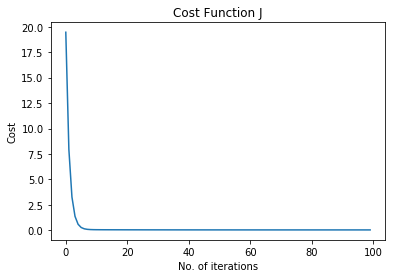

In [136]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

plt.plot(cost_new)
plt.show()

In [137]:
Y1=np.array([0.085, 13.0, 10.5, 1.0, 0.8, 4.78, 39.0, 5.5, 5.5, 331.0, 13.3, 390.5, 17.71])
Y2=np.array([0.17899, 0, 9.69, 0, 0.585, 5.67, 28.8, 2.7986, 6, 391, 19.2, 393.29, 17.6])

Y1 = np.expand_dims(Y1, axis=0)
Y2 = np.expand_dims(Y2, axis=0)
Y1.shape

(1, 13)

In [138]:
pred_1=np.dot(Y1,theta)
pred_2=np.dot(Y2,theta)

In [139]:
pred_1

array([[521.51718384]])

In [140]:
pred_2

array([[571.52257778]])